<a href="https://colab.research.google.com/github/sancarhacer/MachineLearning/blob/main/16_GradientBoostingRegressorClassifier_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#https://www.kaggle.com/datasets/zain280/concrete-data

In [3]:
df = pd.read_csv("16-concrete_data.csv")
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [6]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
df.isnull().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Strength,0


In [8]:
df.corr()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast Furnace Slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse Aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine Aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


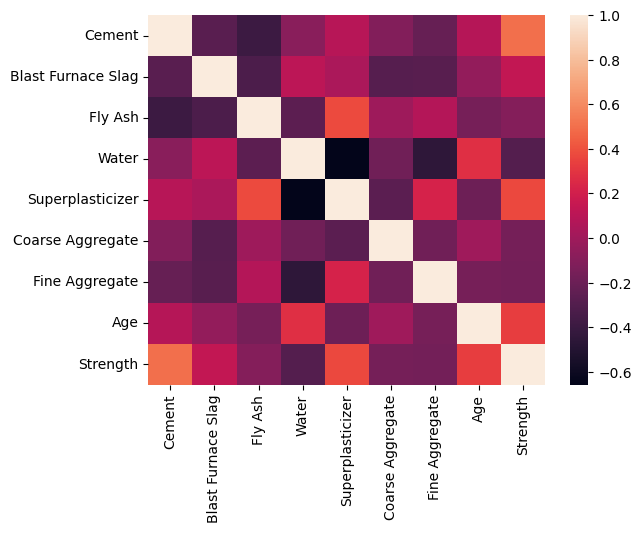

In [9]:
sns.heatmap(df.corr())
plt.show()

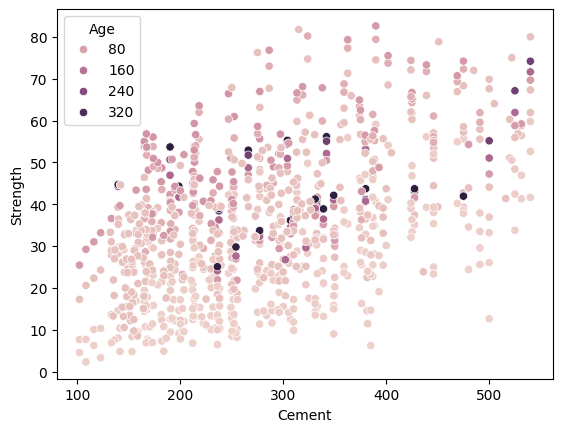

In [10]:
sns.scatterplot(data=df, x="Cement", y="Strength", hue="Age")
plt.show()

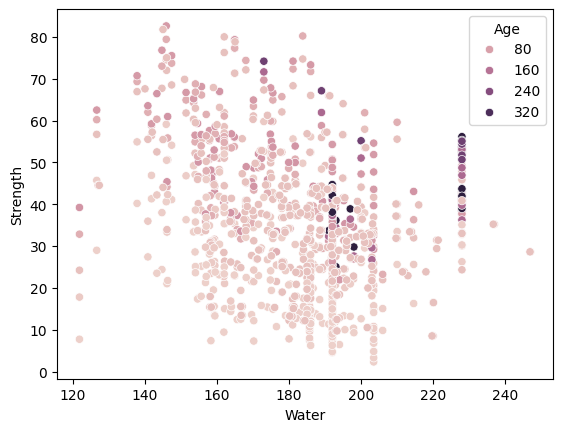

In [11]:
sns.scatterplot(data=df, x="Water", y="Strength", hue="Age")
plt.show()

In [12]:
# dependent feature -> Strength
X = df.drop("Strength", axis = 1)
y = df["Strength"]

In [13]:
# i won't do any feature engineering since it is not needed at this point
# you can scale the features but it is not essential since it will be a dt algorithm
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 15)

In [14]:
# first let's do a manual gradient boosting (this is just to understand how it works)
from sklearn.tree import DecisionTreeRegressor
# first weak learner
tree_reg1 = DecisionTreeRegressor(max_depth = 3)
tree_reg1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [15]:
# Residual Error from the first decision tree
y2 = y_train - tree_reg1.predict(X_train)
y2[:5]

,Strength
919,-15.044359
641,-2.967000
535,2.098039
835,-10.123407
583,-2.334359


In [16]:
# Second weak learner
# we are fitting this with not y_train but with y2 (which is the residual errors from the first dt)
tree_reg2 = DecisionTreeRegressor(max_depth = 4)
tree_reg2.fit(X_train, y2)

DecisionTreeRegressor(max_depth=4)

In [17]:
# Residual error of the second weak learner
y3 = y2 - tree_reg2.predict(X_train)
y3[:5]

,Strength
919,-7.776773
641,-0.353441
535,9.365625
835,-4.303430
583,-3.033962


In [18]:

#third weak learner
tree_reg3 = DecisionTreeRegressor(max_depth = 4)
tree_reg3.fit(X_train, y3)

DecisionTreeRegressor(max_depth=4)

In [19]:
y4 = y3 - tree_reg3.predict(X_train)
y4[:5]

,Strength
919,-8.311212
641,-0.887880
535,8.831186
835,-0.209931
583,-0.406351


In [20]:
# let's calculate the final score (we can obviously increase the number of weak learners if we want)
y_pred = sum(tree.predict(X_test) for tree in (tree_reg1, tree_reg2, tree_reg3))
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.815949465863222

In [21]:
tree_reg4 = DecisionTreeRegressor(max_depth = 4)
tree_reg4.fit(X_train, y4)

DecisionTreeRegressor(max_depth=4)

In [22]:
y_pred = sum(tree.predict(X_test) for tree in (tree_reg1, tree_reg2, tree_reg3, tree_reg4))
r2_score(y_test, y_pred)

0.8164029936095347

In [23]:
# now let's do this automatically with sklearn
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=3, max_depth = 3, learning_rate = 0.1)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=3)

In [24]:
y_pred = gbr.predict(X_test)
r2_score(y_test, y_pred)

0.31671418229216797

In [25]:
gbr = GradientBoostingRegressor(n_estimators=100, max_depth = 3, learning_rate = 0.1)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
r2_score(y_test, y_pred)

0.9247306198159041

In [26]:
#hyperparameter tuning
params = {
        "n_estimators" : [100, 150, 200],
        "max_depth" : [3,4,5],
        "loss" : ["squared_error", "absolute_error", "huber", "quantile"],
        "learning_rate" : [0.01, 0.1, 0.5]
}

In [27]:
from sklearn.model_selection import RandomizedSearchCV
rscv = RandomizedSearchCV(estimator=GradientBoostingRegressor(), param_distributions=params, cv=5)
rscv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.5],
                                        'loss': ['squared_error',
                                                 'absolute_error', 'huber',
                                                 'quantile'],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [100, 150, 200]})

In [28]:
y_pred = rscv.predict(X_test)
r2_score(y_test, y_pred)

0.9514546731303919

In [29]:
df = pd.read_csv("16-heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [30]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [31]:
df['target'].value_counts()

,count
target,
1,165
0,138


In [32]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


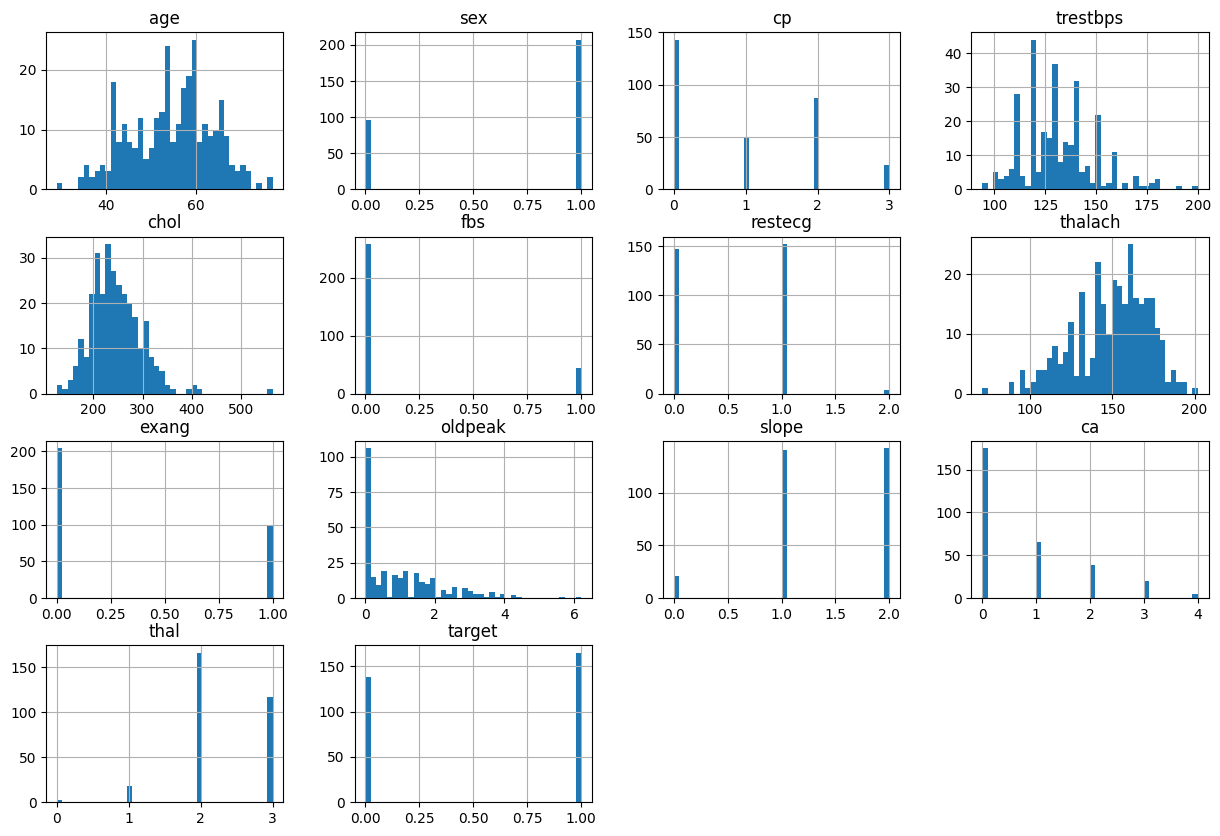

In [33]:
df.hist(bins=40, figsize=(15,10))
plt.show()

In [34]:
X = df.drop('target', axis = 1)
y = df['target']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15)

In [36]:
# if you are not sure about features and their meaning, at least we can check if there
# are some features correlated with a high rate with each other
def correlation_for_dropping(df, threshold):
    columns_to_drop = set()
    corr = df.corr()
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i, j]) > threshold:
                colname = corr.columns[i]
                columns_to_drop.add(colname)
    return columns_to_drop

In [37]:
correlation_for_dropping(X_train, 0.85)

set()

In [38]:
# luckily we do not have to drop any column
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [39]:

y_pred = gb.predict(X_test)
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78        31
           1       0.76      0.83      0.79        30

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61

[[23  8]
 [ 5 25]]


In [40]:
#hyperparameter tuning
parameters = {
        "loss" : ['log_loss', 'exponential'],
        "learning_rate" : [0.01, 0.05, 0.1],
        "n_estimators" : [100, 150, 180, 200],
        "max_depth" : [3,4,5],
        "subsample" : [0.8, 1.0]
}
grid_search = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid = parameters, cv = 5, n_jobs = -1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'loss': ['log_loss', 'exponential'],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 150, 180, 200],
                         'subsample': [0.8, 1.0]},
             verbose=1)

In [41]:
print(grid_search.best_params_)
y_pred = grid_search.predict(X_test)
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

{'learning_rate': 0.01, 'loss': 'exponential', 'max_depth': 3, 'n_estimators': 150, 'subsample': 0.8}
              precision    recall  f1-score   support

           0       0.89      0.78      0.83        32
           1       0.79      0.90      0.84        29

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

[[25  7]
 [ 3 26]]
